## Intial Setup

Git Clone HRNet Repo

In [ ]:
!git clone https://github.com/HRNet/HRNet-Human-Pose-Estimation.git

Cloning into 'HRNet-Human-Pose-Estimation'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 140 (delta 43), reused 43 (delta 43), pack-reused 68 (from 1)
Receiving objects: 100% (140/140), 1.69 MiB | 52.41 MiB/s, done.
Resolving deltas: 100% (65/65), done.


Install Dependencies

In [ ]:
%cd HRNet-Human-Pose-Estimation
!python -m pip install -r requirements.txt
!python -m pip install gdown yacs

/content/HRNet-Human-Pose-Estimation
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.1.15 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==3.4.1.15


Add to python path - for colab

In [ ]:
import sys
sys.path.insert(0, './')
sys.path.insert(0, './lib')

## Download model weights

In [ ]:
import gdown
from models.pose_hrnet import PoseHighResolutionNet
import torch

gdown.download(id='1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS', output='./weights/', quiet=False)

/content/HRNet-Human-Pose-Estimation/lib/models/pose_hrnet.py:487: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  or self.pretrained_layers[0] is '*':
Downloading...
From (original): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS
From (redirected): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS&confirm=t&uuid=008dd254-a059-43df-ac22-06887bcba59f
To: /content/HRNet-Human-Pose-Estimation/weights/pose_hrnet_w48_384x288.pth
100%|██████████| 255M/255M [00:03<00:00, 81.1MB/s]


'./weights/pose_hrnet_w48_384x288.pth'

## Load Model with weights

In [ ]:
from yacs.config import CfgNode as CN

cfg = CN(new_allowed=True)
cfg.merge_from_file('experiments/coco/hrnet/w48_384x288_adam_lr1e-3.yaml')

model = PoseHighResolutionNet(
    cfg,
    is_train=False,
    with_flip_test=True,
)

state_dict = torch.load('./weights/pose_hrnet_w48_384x288.pth')
model.load_state_dict(state_dict, strict=True)
model.eval()

PoseHighResolutionNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(i

## Image Prep

In [ ]:
from ctypes import resize
import cv2
import numpy as np
import torchvision.transforms as transforms

def pre_process_image(img, t_size = (384, 288)):

    # read and convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # center, scale
    h, w, _ = img.shape
    center = np.array([w / 2.0, h / 2.0])
    scale = np.array([w / 200.0, h / 200.0])

    # resizing
    resized_img = cv2.resize(img, t_size)

    # normalization, params pulled from coco dataset
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    )

    # convert to tensor
    to_tensor = transforms.ToTensor()

    # add a dimension to account for batch size
    image_tensor = normalize(to_tensor(resized_img)).unsqueeze(0)

    return image_tensor, img, resized_img, w, h, center, scale

Download the image

In [ ]:
gdown.download(id='15lNLJuUqpZxQ5eK8JKFDWnFi9MiKuSpr', output='./test_run/', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15lNLJuUqpZxQ5eK8JKFDWnFi9MiKuSpr
To: /content/HRNet-Human-Pose-Estimation/test_run/010-cl-02-090.avi
100%|██████████| 144k/144k [00:00<00:00, 96.4MB/s]


'./test_run/010-cl-02-090.avi'

Select Middle Frame as image

In [ ]:
import cv2

cap = cv2.VideoCapture('./test_run/010-cl-02-090.avi')
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
middle = total_frames // 2

cap.set(cv2.CAP_PROP_POS_FRAMES, middle)
ret, middle_frame = cap.read()

cap.release()

In [ ]:
image_tensor, img, resized_img, w, h, center, scale = pre_process_image(middle_frame)

## Forward Pass

### Helper Functions
These are functions directly pulled from original author's code.

In [ ]:
import math

def get_dir(src_point, rot_rad):
    sn, cs = np.sin(rot_rad), np.cos(rot_rad)

    src_result = [0, 0]
    src_result[0] = src_point[0] * cs - src_point[1] * sn
    src_result[1] = src_point[0] * sn + src_point[1] * cs

    return src_result

def get_3rd_point(a, b):
    direct = a - b
    return b + np.array([-direct[1], direct[0]], dtype=np.float32)

def transform_preds(coords, center, scale, output_size):
    target_coords = np.zeros(coords.shape)
    trans = get_affine_transform(center, scale, 0, output_size, inv=1)
    for p in range(coords.shape[0]):
        target_coords[p, 0:2] = affine_transform(coords[p, 0:2], trans)
    return target_coords

def get_3rd_point(a, b):
    direct = a - b
    return b + np.array([-direct[1], direct[0]], dtype=np.float32)


def affine_transform(pt, t):
    new_pt = np.array([pt[0], pt[1], 1.]).T
    new_pt = np.dot(t, new_pt)
    return new_pt[:2]

def get_affine_transform(
        center, scale, rot, output_size,
        shift=np.array([0, 0], dtype=np.float32), inv=0
):
    if not isinstance(scale, np.ndarray) and not isinstance(scale, list):
        print(scale)
        scale = np.array([scale, scale])

    scale_tmp = scale * 200.0
    src_w = scale_tmp[0]
    dst_w = output_size[0]
    dst_h = output_size[1]

    rot_rad = np.pi * rot / 180
    src_dir = get_dir([0, src_w * -0.5], rot_rad)
    dst_dir = np.array([0, dst_w * -0.5], np.float32)

    src = np.zeros((3, 2), dtype=np.float32)
    dst = np.zeros((3, 2), dtype=np.float32)
    src[0, :] = center + scale_tmp * shift
    src[1, :] = center + src_dir + scale_tmp * shift
    dst[0, :] = [dst_w * 0.5, dst_h * 0.5]
    dst[1, :] = np.array([dst_w * 0.5, dst_h * 0.5]) + dst_dir

    src[2:, :] = get_3rd_point(src[0, :], src[1, :])
    dst[2:, :] = get_3rd_point(dst[0, :], dst[1, :])

    if inv:
        trans = cv2.getAffineTransform(np.float32(dst), np.float32(src))
    else:
        trans = cv2.getAffineTransform(np.float32(src), np.float32(dst))

    return trans


In [ ]:
def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''
    assert isinstance(batch_heatmaps, np.ndarray), \
        'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals


def get_final_preds(config, batch_heatmaps, center, scale):
    coords, maxvals = get_max_preds(batch_heatmaps)

    heatmap_height = batch_heatmaps.shape[2]
    heatmap_width = batch_heatmaps.shape[3]

    # post-processing
    if config.TEST.POST_PROCESS:
        for n in range(coords.shape[0]):
            for p in range(coords.shape[1]):
                hm = batch_heatmaps[n][p]
                px = int(math.floor(coords[n][p][0] + 0.5))
                py = int(math.floor(coords[n][p][1] + 0.5))
                if 1 < px < heatmap_width-1 and 1 < py < heatmap_height-1:
                    diff = np.array(
                        [
                            hm[py][px+1] - hm[py][px-1],
                            hm[py+1][px]-hm[py-1][px]
                        ]
                    )
                    coords[n][p] += np.sign(diff) * .25

    preds = coords.copy()

    # Transform back
    for i in range(coords.shape[0]):
        preds[i] = transform_preds(
            coords[i], center[i], scale[i], [heatmap_width, heatmap_height]
        )

    return preds, maxvals


### Run Inference

In [ ]:
with torch.no_grad():
    output = model(image_tensor)

# heatmap -> keypoint coords (we dont need maxvals)
final_predictions, _ = get_final_preds(
    cfg,
    output.clone().cpu().numpy(),
    center,
    scale
    )

# check if its correctly returning keyypoints
print("Shape of the final predictions:", final_predictions.shape)
print("Predicted keypoints:\n", final_predictions)

1.28
Shape of the final predictions: (1, 17, 2)
Predicted keypoints:
 [[[115.333336  68.666664]
  [119.333336  66.      ]
  [118.        66.      ]
  [128.66667   70.      ]
  [128.66667   70.      ]
  [130.        87.333336]
  [124.666664  84.666664]
  [122.       111.333336]
  [122.       110.      ]
  [111.333336 132.66667 ]
  [114.       135.33333 ]
  [128.66667  135.33333 ]
  [119.333336 135.33333 ]
  [134.       160.66667 ]
  [112.666664 163.33333 ]
  [168.66667  186.      ]
  [104.666664 191.33333 ]]]


## Display Coordinates

In [ ]:
import matplotlib.pyplot as plt

def plot_pose_with_lines(image, joints, joint_connections):

    # Plot the image.
    plt.imshow(image)

    # Plot keypoints and connections.
    for person_joints in joints:
        # keypoints.
        plt.scatter(person_joints[:, 0], person_joints[:, 1], s=25, c='red')

        # connections.
        for connection in joint_connections:
            p1_idx, p2_idx = connection
            p1 = person_joints[p1_idx]
            p2 = person_joints[p2_idx]
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')

    plt.show()

# joint connections from coco dataset
joint_connections = [
    (0, 1), (0, 2), (1, 3), (2, 4),
    (5, 6), (5, 7), (7, 9), (6, 8), (8, 10),
    (5, 11), (6, 12), (11, 12),
    (11, 13), (13, 15), (12, 14), (14, 16)
]

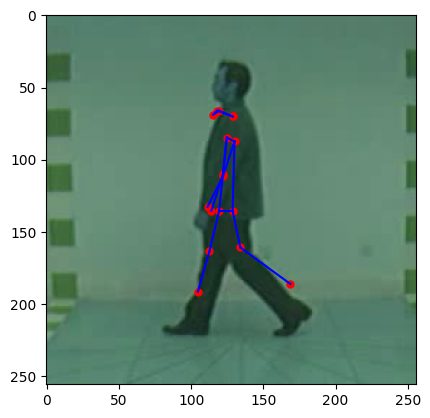

In [ ]:
plot_pose_with_lines(middle_frame, final_predictions, joint_connections)